## **Stock Dashboard**

In [3]:
import yfinance as yf
import pandas as pd
import numpy as np
import requests as rq
from bs4 import BeautifulSoup as bs
import plotly.graph_objects as go
from plotly.subplots import make_subplots
print("Imports Successful")

Imports Successful


#### **Tesla Stock Data**

In [73]:
tesla = yf.Ticker("TSLA")
tesla_stock = tesla.history(period="max")
tesla_stock.reset_index(inplace=True)
tesla_stock = tesla_stock[['Date', 'Close']]
tesla_stock = tesla_stock.rename(columns={"Close": "Price"})
tesla_stock['Date'] = pd.to_datetime(tesla_stock['Date']).dt.date
tesla_stock.head()

,Date,Price
0,2010-06-29,1.592667
1,2010-06-30,1.588667
2,2010-07-01,1.464000
3,2010-07-02,1.280000
4,2010-07-06,1.074000


#### **Tesla Revenue Data**

In [46]:
## Download Data
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm"
tesla_data  = rq.get(url).text
print(tesla_data[:30], '... ... ... OF TOTAL:', len(tesla_data))


<!DOCTYPE html>
<!--[if lt IE ... ... ... OF TOTAL: 64779


In [47]:
# Parse HTML
tesla_soup = bs(tesla_data, "html.parser")
tesla_soup.title.string

'Tesla Revenue 2010-2022 | TSLA | MacroTrends'

In [48]:
# Create List of Table Rows
#table_bs = bs(data, "html.parser")
tesla_rows = tesla_soup.find_all('tr') # List

In [49]:
# Create a Zero Numpy Array for Data
tesla_num_rows = 14
tesla_array = np.zeros(shape=(tesla_num_rows, 2), dtype=object)

In [50]:
# Populate Numpy Array with Table Data
for i, row in enumerate(tesla_rows):
    if i < tesla_num_rows:
        cells = row.find_all('td')
        for j, cell in enumerate(cells):
            tesla_array[i-1,j] = cell.string 

In [79]:
# Create DataFrame and Clean Data
tesla_revenue = pd.DataFrame(tesla_array[:], 
                  columns=['Year','Revenue'])
tesla_revenue = tesla_revenue.astype({"Year":str,"Revenue":str})
tesla_revenue = tesla_revenue.drop(tesla_revenue.index[13])                  # Remove that last None row
tesla_revenue.Revenue = tesla_revenue.Revenue.apply(lambda s: s.replace(",","")) # Remove Volume Commas
tesla_revenue.Revenue = tesla_revenue.Revenue.apply(lambda s: s.replace("$","")) # Remove Volume $
tesla_revenue = tesla_revenue.astype({"Year":int,"Revenue":int})   # Convert Volume to Integer
tesla_revenue = tesla_revenue.reindex(index=tesla_revenue.index[::-1])
tesla_revenue = tesla_revenue.reset_index()
tesla_revenue.drop(['index'], inplace=True, axis=1)
tesla_revenue.head()

,Year,Revenue
0,2009,112
1,2010,117
2,2011,204
3,2012,413
4,2013,2013


#### **GameStop Stock Data**

In [72]:
gamestop = yf.Ticker("GME")
gamestop_stock = gamestop.history(period="max")
gamestop_stock.reset_index(inplace=True)
gamestop_stock = gamestop_stock[['Date', 'Close']]
gamestop_stock = gamestop_stock.rename(columns={"Close": "Price"})
gamestop_stock['Date'] = pd.to_datetime(gamestop_stock['Date']).dt.date
gamestop_stock.head()

,Date,Price
0,2002-02-13,1.691666
1,2002-02-14,1.683251
2,2002-02-15,1.674834
3,2002-02-19,1.607504
4,2002-02-20,1.662210


#### **GameStop Revenue Data**

In [12]:
## Download Data
url = " https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html"
gamestop_data  = rq.get(url).text
print(gamestop_data[:30], '... ... ... OF TOTAL:', len(gamestop_data))

<!DOCTYPE html>
<!-- saved fro ... ... ... OF TOTAL: 88703


In [13]:
# Parse HTML
gamestop_soup = bs(gamestop_data, "html.parser")
gamestop_soup.title.string

'GameStop Revenue 2006-2020 | GME | MacroTrends'

In [14]:
# Create List of Table Rows
gamestop_rows = gamestop_soup.find_all('tr') # List

In [15]:
# Create a Zero Numpy Array for Data
gamestop_num_rows = 17
gamestop_array = np.zeros(shape=(gamestop_num_rows, 2), dtype=object)

In [16]:
# Populate Numpy Array with Table Data
for i, row in enumerate(gamestop_rows):
    if i < gamestop_num_rows:
        cells = row.find_all('td')
        for j, cell in enumerate(cells):
            gamestop_array[i-1,j] = cell.string 

In [77]:
# Create DataFrame and Clean Data
gamestop_revenue = pd.DataFrame(gamestop_array[:], 
                           columns=['Year','Revenue'])
gamestop_revenue = gamestop_revenue.astype({"Year":str,"Revenue":str})
gamestop_revenue = gamestop_revenue.drop(gamestop_revenue.index[16])       # Remove that last None row
gamestop_revenue.Revenue = gamestop_revenue.Revenue.apply(lambda s: s.replace(",","")) # Remove Volume Commas
gamestop_revenue.Revenue = gamestop_revenue.Revenue.apply(lambda s: s.replace("$","")) # Remove Volume $
gamestop_revenue = gamestop_revenue.astype({"Year":int,"Revenue":int})   # Convert Volume to Integer
gamestop_revenue = gamestop_revenue.reindex(index=gamestop_revenue.index[::-1])
gamestop_revenue = gamestop_revenue.reset_index()
gamestop_revenue.drop(['index'], inplace=True, axis=1)
gamestop_revenue.head()

,Year,Revenue
0,2005,1843
1,2006,3092
2,2007,5319
3,2008,7094
4,2009,8806


#### **Graphing Stock and Revenue**

In [32]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

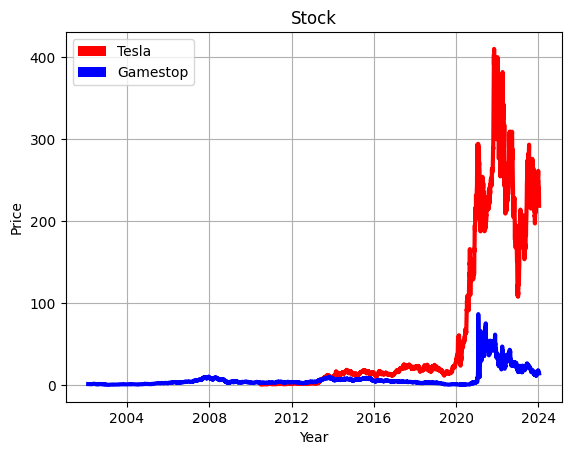

In [59]:
# Plot Stock Closing Prices
plt.plot(tesla_stock.Date,  tesla_stock.Price, color="r", linestyle="-", linewidth=3)
plt.plot(gamestop_stock.Date,  gamestop_stock.Price, color="b", linestyle="-", linewidth=3)
plt.title("Stock")
plt.xlabel("Year")
plt.ylabel("Price")
plt.grid(True)
classes = ['Tesla','Gamestop']
colors = ['red', 'blue']
recs = []
for i in range(0,len(colors)):
    recs.append(plt.Rectangle((0,0),1,1,fc=colors[i]))
plt.legend(recs,classes,loc=2)
plt.show()

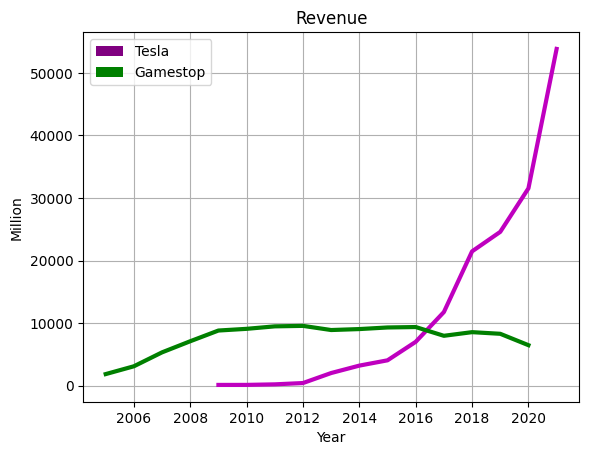

In [57]:
# Plot Revenue
plt.plot(tesla_revenue.Year,  tesla_revenue.Revenue, color="m", linestyle="-", linewidth=3)
plt.plot(gamestop_revenue.Year,  gamestop_revenue.Revenue, color="g", linestyle="-", linewidth=3)
plt.title("Revenue")
plt.xlabel("Year")
plt.ylabel("Million")
plt.grid(True)
classes = ['Tesla','Gamestop']
colors = ['purple', 'green']
recs = []
for i in range(0,len(colors)):
    recs.append(plt.Rectangle((0,0),1,1,fc=colors[i]))
plt.legend(recs,classes,loc=2)
plt.show()